# Analyse Exploratoire des données

In [247]:
#Importation des bibilothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool
import shap


In [248]:
#Importation des données
data_test=pd.read_csv("data/test.csv")
data_train=pd.read_csv("data/train.csv")
X_test = data_test.copy()

In [249]:
data_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15713774.0,Hsieh,683.0,Germany,Male,49.0,7.0,123837.86,2.0,1.0,1.0,138700.75,1.0
1,1,15682533.0,Hs?eh,608.0,France,Female,30.0,10.0,0.00,2.0,1.0,1.0,146723.72,0.0
2,2,15791550.0,Tsou,539.0,France,Female,32.0,8.0,0.00,1.0,1.0,1.0,94873.60,0.0
3,3,15762762.0,Chiawuotu,530.0,Spain,Female,39.0,8.0,0.00,2.0,0.0,0.0,177896.93,0.0
4,4,15756475.0,Nnamdi,613.0,France,Female,45.0,10.0,0.00,2.0,1.0,1.0,116748.14,0.0


In [250]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


In [251]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10000 non-null  int64  
 1   CustomerId       10000 non-null  float64
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  float64
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  float64
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  float64
 10  HasCrCard        10000 non-null  float64
 11  IsActiveMember   10000 non-null  float64
 12  EstimatedSalary  10000 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 1015.8+ KB


On peut déjà remarquer que dans les deux bases de données , il n'y a pas de valeurs manquantes

In [252]:
data_train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,1.570073e+07,658.701800,37.660800,5.038800,42888.826095,1.589467,0.779800,0.497867,117892.175400,0.199333
std,4330.271354,1.162730e+06,80.238346,8.106408,2.810354,59695.877791,0.532430,0.414395,0.500012,45574.462515,0.399512
min,0.000000,1.557151e+05,431.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,3749.750000,1.563387e+07,602.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,82870.750000,0.000000
50%,7499.500000,1.569018e+07,661.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,123583.850000,0.000000
75%,11249.250000,1.575972e+07,709.000000,42.000000,7.000000,109844.810000,2.000000,1.000000,1.000000,157567.370000,0.000000
max,14999.000000,1.562648e+08,4818.000000,72.000000,10.000000,207034.960000,6.000000,1.000000,1.000000,199761.290000,1.000000


Division de la base de données train en train et en validation

In [253]:
donnees_train, donnees_validation = train_test_split(data_train ,test_size=0.3, random_state=100, stratify=data_train["Exited"])

Vérification de la distribution de la variable cible dans les deux bases(donnes_train,donnees_validation)

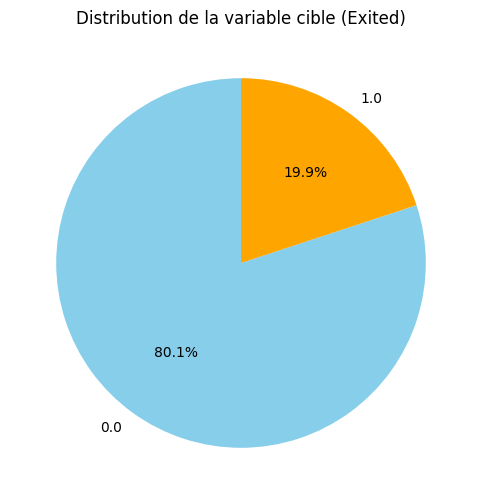

In [254]:
target_distribution = donnees_train['Exited'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    target_distribution,
    labels=target_distribution.index,
    autopct='%1.1f%%',  
    startangle=90,      
    colors=['skyblue', 'orange'] 
)
plt.title('Distribution de la variable cible (Exited)')
plt.show()

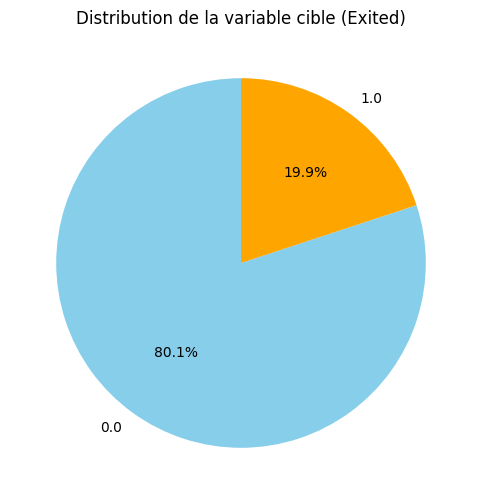

In [255]:
target_distribution = donnees_validation['Exited'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    target_distribution,
    labels=target_distribution.index,
    autopct='%1.1f%%',  
    startangle=90,      
    colors=['skyblue', 'orange'] 
)
plt.title('Distribution de la variable cible (Exited)')
plt.show()

Vérification a travers un PSI(indice de stabilité de population pour plusieurs variables)

In [256]:
def calculate_psi(expected, actual, bins=5):
   
    if not np.issubdtype(expected.dtype, np.number) or not np.issubdtype(actual.dtype, np.number):
        raise ValueError("Les colonnes doivent être numériques pour calculer le PSI.")
    

    breakpoints = np.linspace(expected.min(), expected.max(), bins + 1)
    
  
    expected_percents = np.histogram(expected, bins=breakpoints)[0] / len(expected)
    actual_percents = np.histogram(actual, bins=breakpoints)[0] / len(actual)
    
    
    actual_percents = np.where(actual_percents == 0, 1e-8, actual_percents)
    expected_percents = np.where(expected_percents == 0, 1e-8, expected_percents)
    
  
    psi = np.sum((expected_percents - actual_percents) * np.log(expected_percents / actual_percents))
    return psi


variables = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

for var in variables:
    psi_value = calculate_psi(donnees_train[var], donnees_train[var])  # Remplacez par `donnees_test[var]` pour la comparaison
    print(f"PSI for {var}: {psi_value:.4f}")
    if psi_value < 0.1:
        print(f"Les distributions de {var} sont très similaires. L’échantillon est représentatif.\n")
    else:
        print(f"Les distributions de {var} sont différentes. Vérifiez la représentativité de l’échantillon.\n")


PSI for CreditScore: 0.0000
Les distributions de CreditScore sont très similaires. L’échantillon est représentatif.

PSI for Age: 0.0000
Les distributions de Age sont très similaires. L’échantillon est représentatif.

PSI for Tenure: 0.0000
Les distributions de Tenure sont très similaires. L’échantillon est représentatif.

PSI for Balance: 0.0000
Les distributions de Balance sont très similaires. L’échantillon est représentatif.

PSI for NumOfProducts: 0.0000
Les distributions de NumOfProducts sont très similaires. L’échantillon est représentatif.

PSI for EstimatedSalary: 0.0000
Les distributions de EstimatedSalary sont très similaires. L’échantillon est représentatif.



In [257]:
def calculate_psi(expected, actual, bins=5):
 
    if not np.issubdtype(expected.dtype, np.number) or not np.issubdtype(actual.dtype, np.number):
        raise ValueError("Les colonnes doivent être numériques pour calculer le PSI.")
    
  
    breakpoints = np.linspace(expected.min(), expected.max(), bins + 1)

    expected_percents = np.histogram(expected, bins=breakpoints)[0] / len(expected)
    actual_percents = np.histogram(actual, bins=breakpoints)[0] / len(actual)
   
    actual_percents = np.where(actual_percents == 0, 1e-8, actual_percents)
    expected_percents = np.where(expected_percents == 0, 1e-8, expected_percents)
    
 
    psi = np.sum((expected_percents - actual_percents) * np.log(expected_percents / actual_percents))
    return psi


variables = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

for var in variables:
    psi_value = calculate_psi(donnees_validation[var], donnees_validation[var])  # Remplacez par `donnees_test[var]` pour la comparaison
    print(f"PSI for {var}: {psi_value:.4f}")
    if psi_value < 0.1:
        print(f"Les distributions de {var} sont très similaires. L’échantillon est représentatif.\n")
    else:
        print(f"Les distributions de {var} sont différentes. Vérifiez la représentativité de l’échantillon.\n")

PSI for CreditScore: 0.0000
Les distributions de CreditScore sont très similaires. L’échantillon est représentatif.

PSI for Age: 0.0000
Les distributions de Age sont très similaires. L’échantillon est représentatif.

PSI for Tenure: 0.0000
Les distributions de Tenure sont très similaires. L’échantillon est représentatif.

PSI for Balance: 0.0000
Les distributions de Balance sont très similaires. L’échantillon est représentatif.

PSI for NumOfProducts: 0.0000
Les distributions de NumOfProducts sont très similaires. L’échantillon est représentatif.

PSI for EstimatedSalary: 0.0000
Les distributions de EstimatedSalary sont très similaires. L’échantillon est représentatif.



# Analyse Univariée

Distribution des variables quantitatives

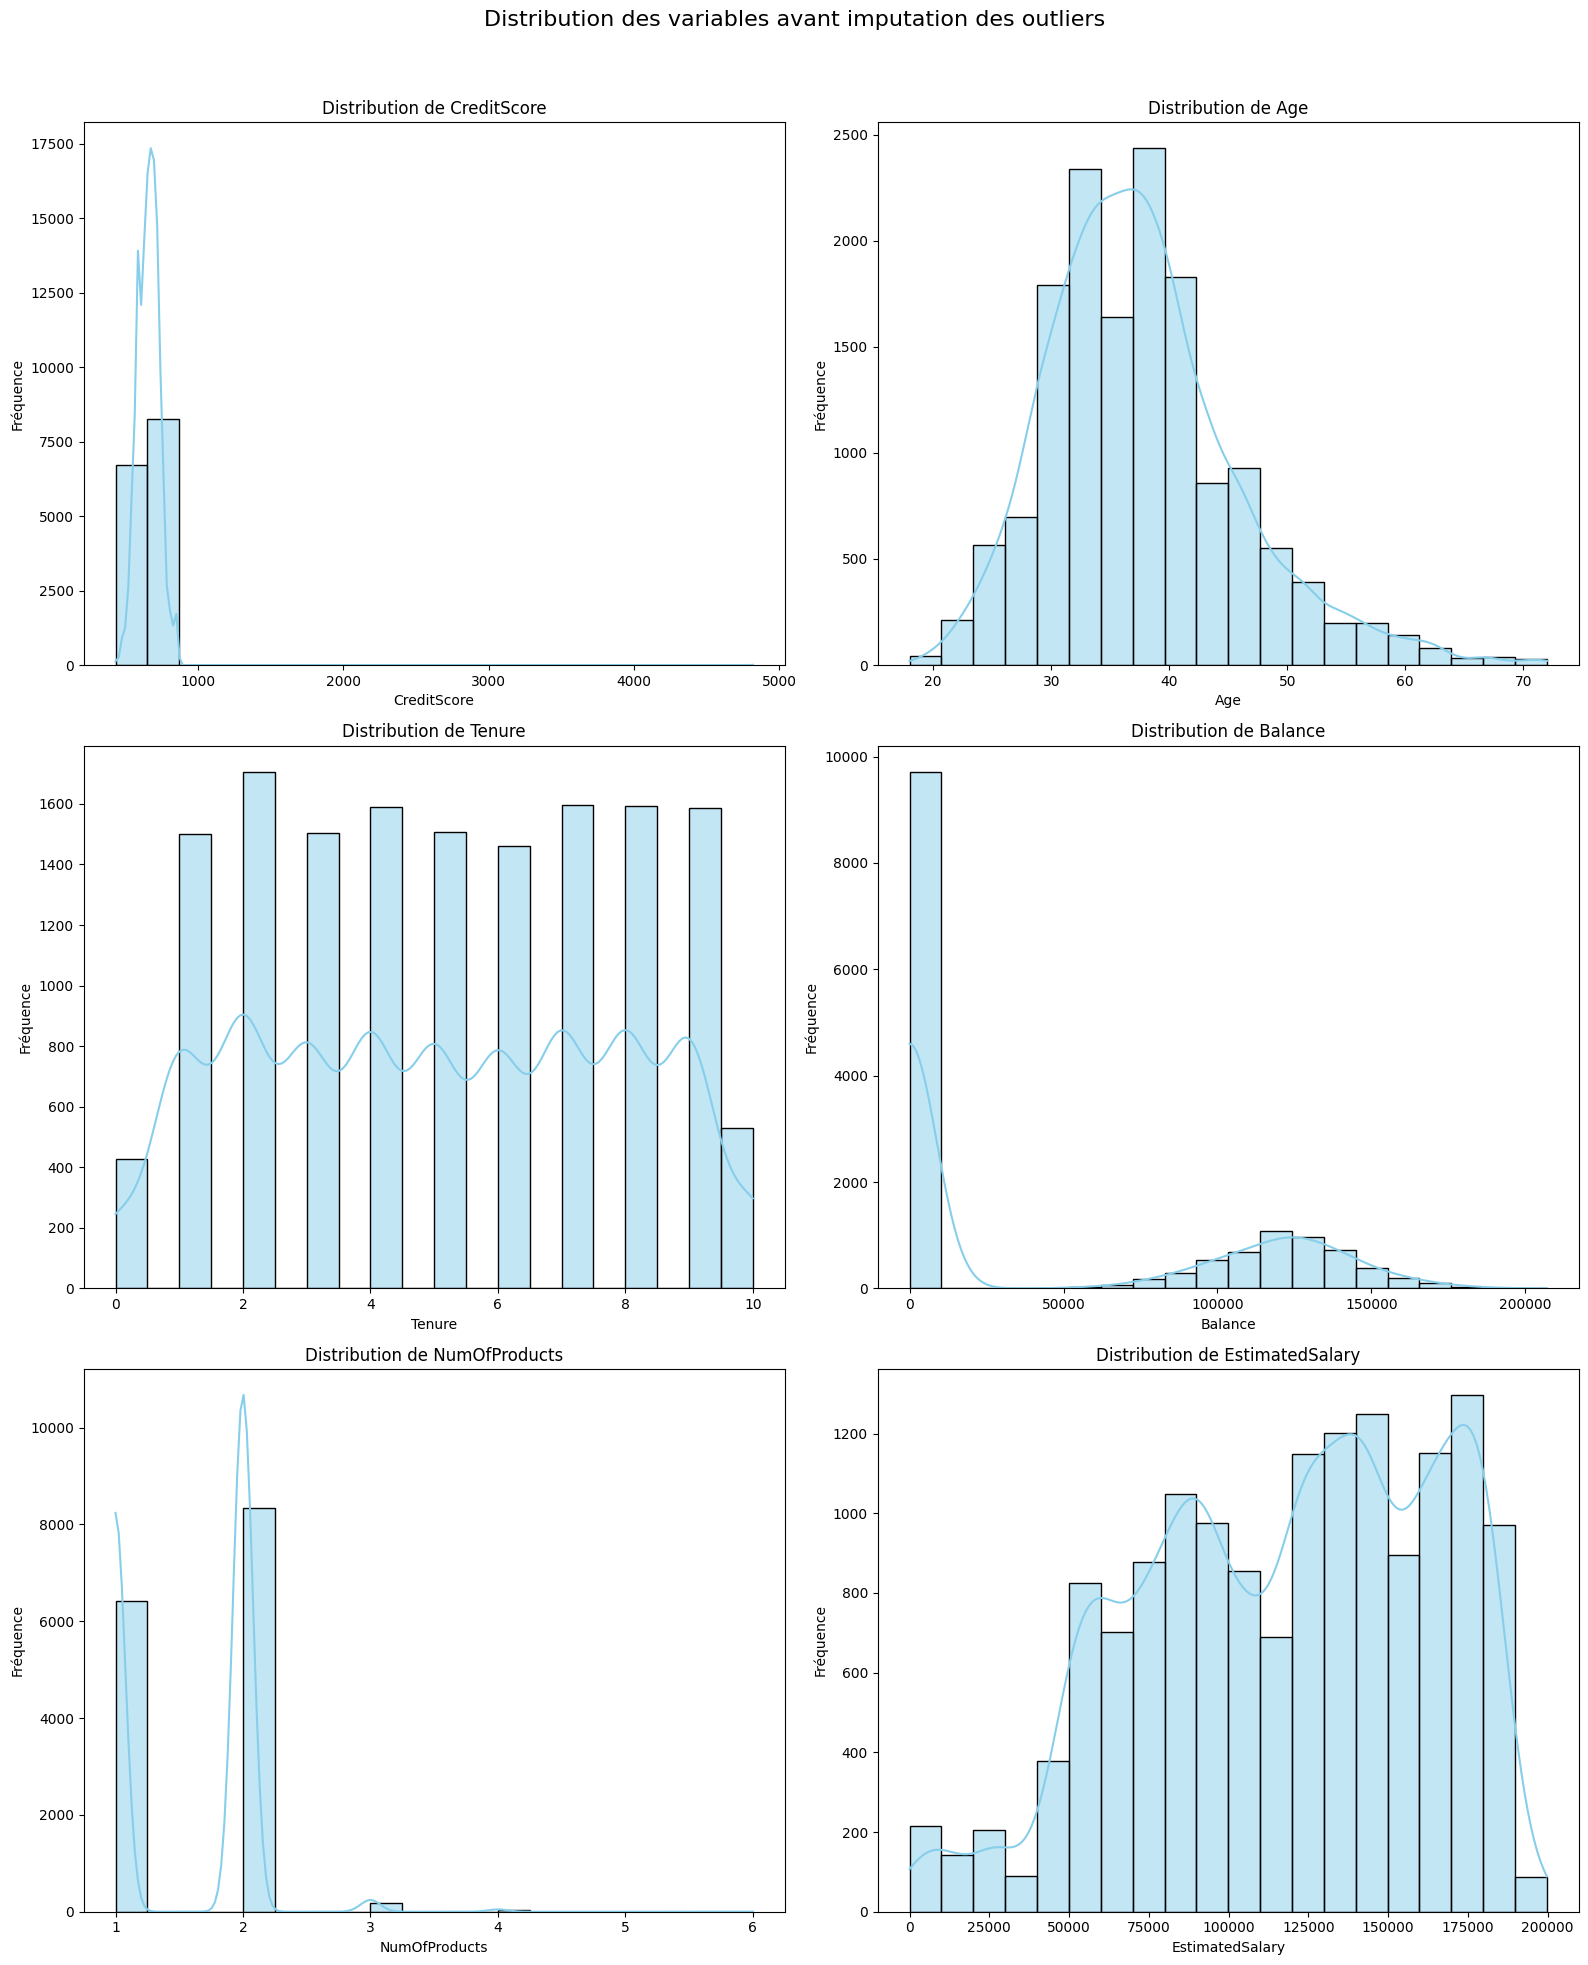

In [258]:
num_col = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 20))
fig.suptitle('Distribution des variables avant imputation des outliers', fontsize=16)


for i, col in enumerate(num_col):
    row = i // 2
    col_position = i % 2
    ax = axes[row, col_position]
    sns.histplot(data_train[col], bins=20, kde=True, color='skyblue', ax=ax)
    ax.set_title(f'Distribution de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Fréquence')


if len(num_col) % 2 != 0:
    axes[-1, -1].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

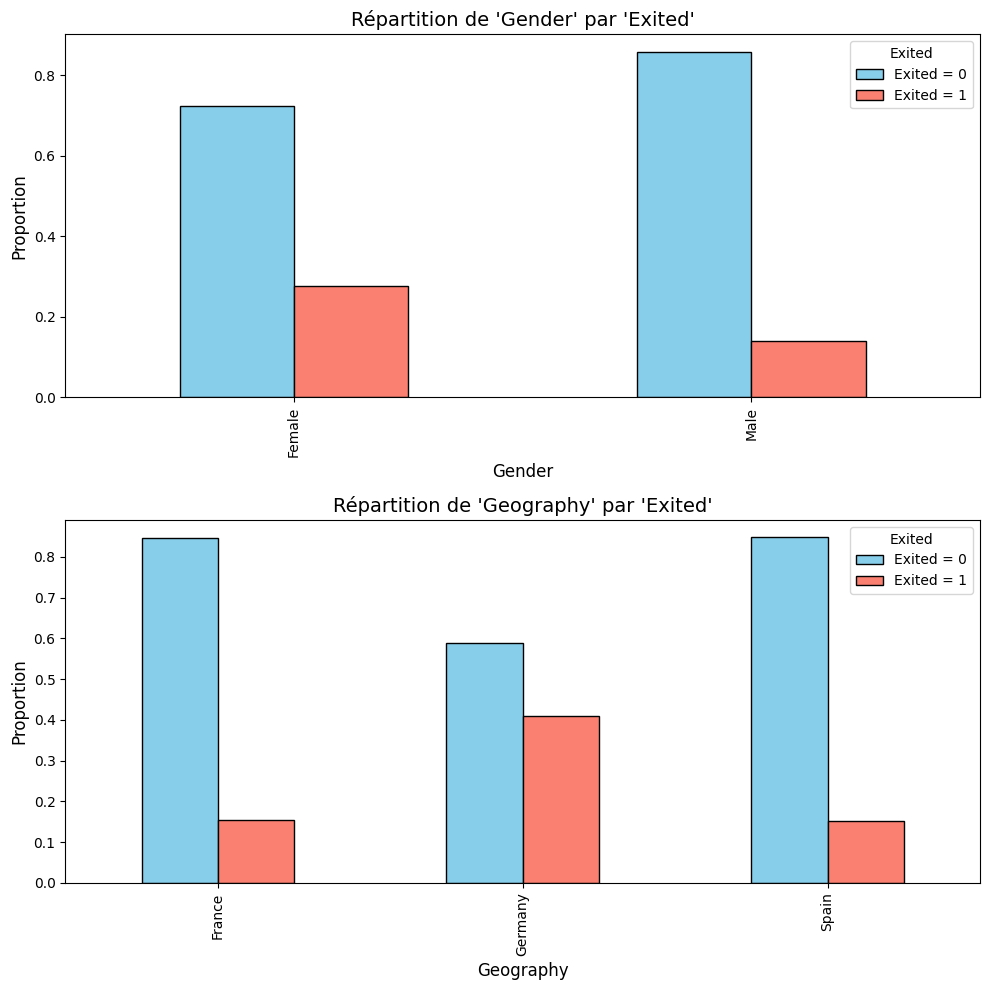

In [259]:
cat_vars = ['Gender', 'Geography']  


n_vars = len(cat_vars)
fig, axes = plt.subplots(nrows=n_vars, figsize=(10, 5 * n_vars))

for i, cat_var in enumerate(cat_vars):
   
    cross_tab = pd.crosstab(donnees_train[cat_var], donnees_train['Exited'])
   
    cross_tab_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0)
    
    
    cross_tab_percent.plot(kind='bar', ax=axes[i], color=['skyblue', 'salmon'], edgecolor='black')
    axes[i].set_title(f"Répartition de '{cat_var}' par 'Exited'", fontsize=14)
    axes[i].set_xlabel(cat_var, fontsize=12)
    axes[i].set_ylabel("Proportion", fontsize=12)
    axes[i].legend(["Exited = 0", "Exited = 1"], title="Exited", fontsize=10)

plt.tight_layout()
plt.show()


Correlation

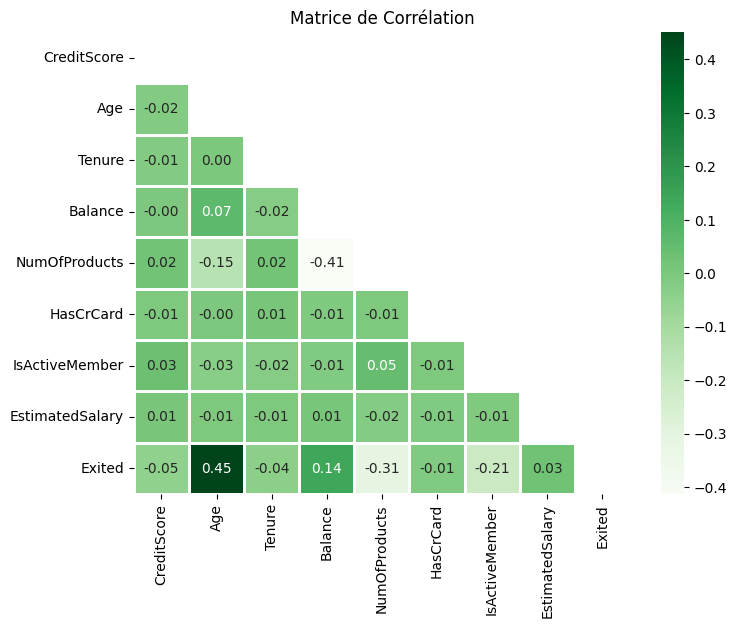

In [260]:
numeric_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'EstimatedSalary', 'Exited']
corr_matrix = donnees_train[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='Greens',linewidths=1,mask=np.triu(corr_matrix),fmt = '.2f', annot=True)
plt.title('Matrice de Corrélation')
plt.show()

In [261]:
# les variables les plus corrélées avec une variable cible
top_corr_with_target = corr_matrix["Exited"].sort_values(ascending=False)
top_corr_with_target= pd.DataFrame(top_corr_with_target)
top_corr_with_target[1:]

,Exited
Age,0.451045
Balance,0.137780
EstimatedSalary,0.027380
HasCrCard,-0.013729
Tenure,-0.036226
CreditScore,-0.045154
IsActiveMember,-0.209352
NumOfProducts,-0.306072


Valeurs manquantes

In [262]:
has_na = donnees_train.isna().any().any()
print("Any NA values in the dataset:", has_na)

Any NA values in the dataset: False


Détection des doublons

In [263]:
# Vérifier s'il y a des doublons
doublons = donnees_train.duplicated()
nb_doublons = doublons.sum()
print(f"Nombre de doublons : {nb_doublons}")

Nombre de doublons : 0


Détection des outliers avec la méthode IQR

In [264]:
numeric_cols=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary','HasCrCard',
       'IsActiveMember']
for col in numeric_cols:

    Q1 = donnees_train[col].quantile(0.25)
    Q3 = donnees_train[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    number_outliers = donnees_train[(donnees_train[col] < lower_bound) | (donnees_train[col] > upper_bound)].shape[0]

    print("Le nombre des outliers de la variable", col, "est", number_outliers)


Le nombre des outliers de la variable CreditScore est 12
Le nombre des outliers de la variable Age est 248
Le nombre des outliers de la variable Tenure est 0
Le nombre des outliers de la variable Balance est 0
Le nombre des outliers de la variable NumOfProducts est 31
Le nombre des outliers de la variable EstimatedSalary est 0
Le nombre des outliers de la variable HasCrCard est 2338
Le nombre des outliers de la variable IsActiveMember est 0


Détection par les outliers 

C:\Users\vongu\AppData\Local\Temp\ipykernel_20968\1727159434.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=donnees_train, x="Exited", y=var, palette="coolwarm")  # Boxplot for the variable


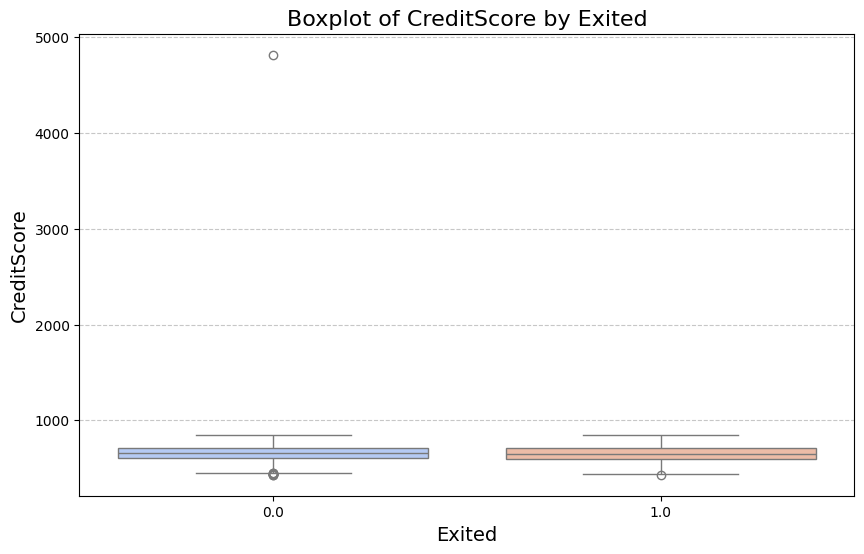

C:\Users\vongu\AppData\Local\Temp\ipykernel_20968\1727159434.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=donnees_train, x="Exited", y=var, palette="coolwarm")  # Boxplot for the variable


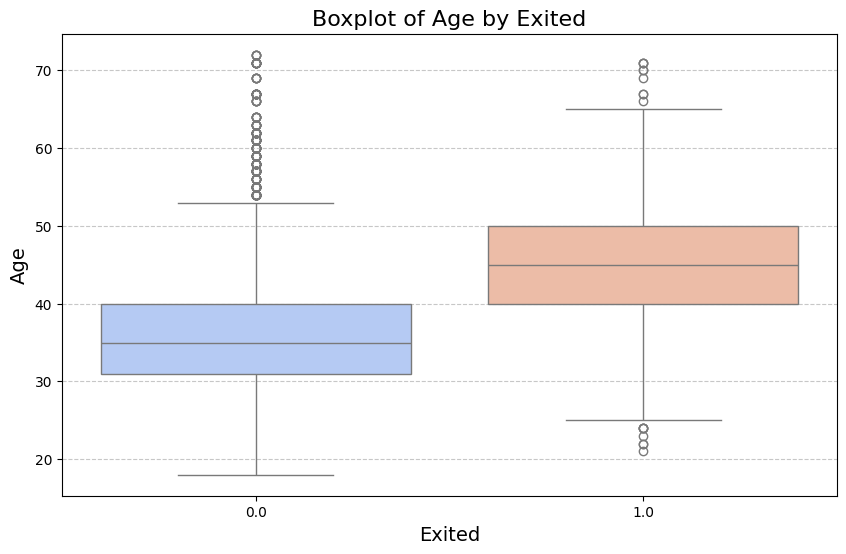

C:\Users\vongu\AppData\Local\Temp\ipykernel_20968\1727159434.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=donnees_train, x="Exited", y=var, palette="coolwarm")  # Boxplot for the variable


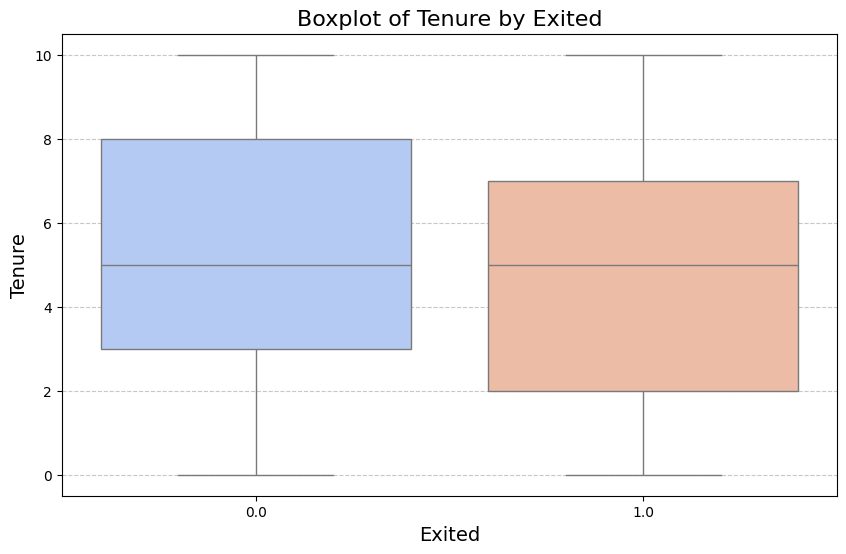

C:\Users\vongu\AppData\Local\Temp\ipykernel_20968\1727159434.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=donnees_train, x="Exited", y=var, palette="coolwarm")  # Boxplot for the variable


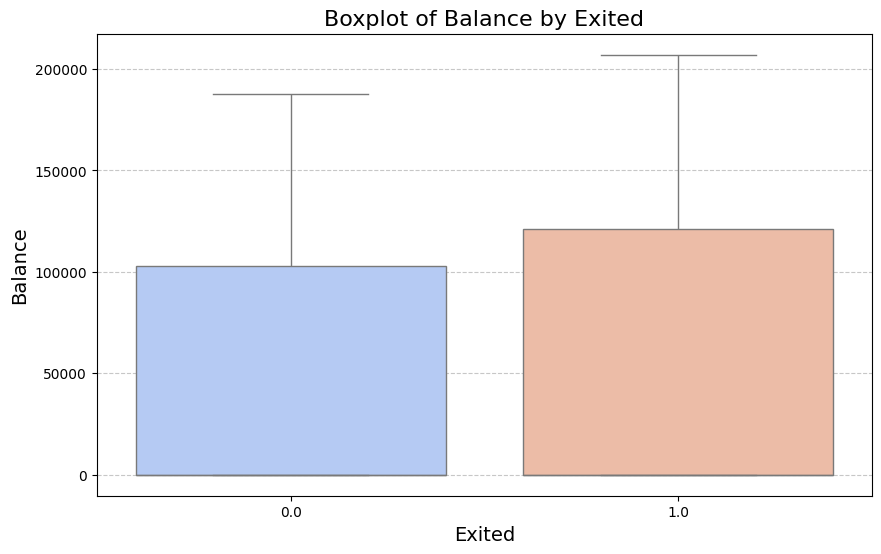

C:\Users\vongu\AppData\Local\Temp\ipykernel_20968\1727159434.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=donnees_train, x="Exited", y=var, palette="coolwarm")  # Boxplot for the variable


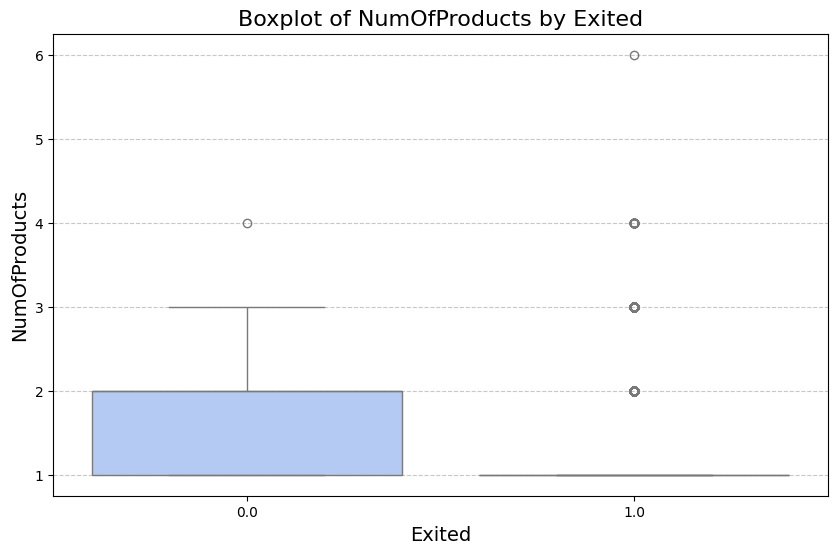

C:\Users\vongu\AppData\Local\Temp\ipykernel_20968\1727159434.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=donnees_train, x="Exited", y=var, palette="coolwarm")  # Boxplot for the variable


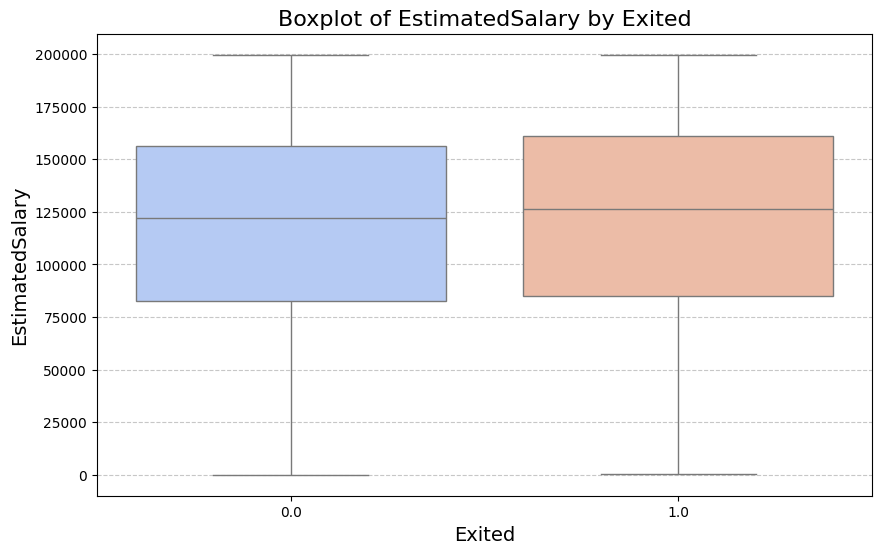

C:\Users\vongu\AppData\Local\Temp\ipykernel_20968\1727159434.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=donnees_train, x="Exited", y=var, palette="coolwarm")  # Boxplot for the variable


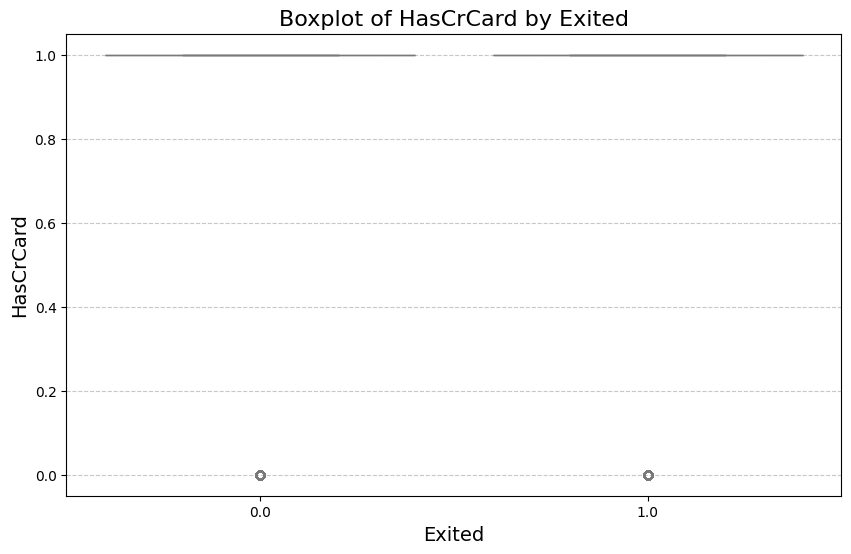

In [265]:
var_num = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'HasCrCard']

for var in var_num:
    plt.figure(figsize=(10, 6))  
    sns.boxplot(data=donnees_train, x="Exited", y=var, palette="coolwarm")  
    plt.title(f"Boxplot of {var} by Exited", fontsize=16)  
    plt.xlabel("Exited", fontsize=14) 
    plt.ylabel(var, fontsize=14)  
    plt.grid(axis='y', linestyle='--', alpha=0.7)  
    plt.show()  


Traitement des données

Supression d'une observation car valeur extreme de CreditScore pour les scores dépassant 1000

In [266]:
# suppression des valeurs aberrantes pour CreditScore
donnees_train = donnees_train[donnees_train['CreditScore'] <= 1000]

In [267]:
# suppression des outliers pour Age
Q1 = donnees_train['Age'].quantile(0.25)
Q3 = donnees_train['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
donnees_train['Age'] = donnees_train['Age'].clip(lower=lower_bound, upper=upper_bound)

# Feature Engineering

In [268]:
categorical_columns = [col for col in ['Geography', 'Gender'] if col in donnees_train.columns]
donnees_train = pd.get_dummies(donnees_train, columns=categorical_columns, drop_first=True)*1
categorical_columns = [col for col in ['Geography', 'Gender'] if col in donnees_validation.columns]
donnees_validation = pd.get_dummies(donnees_validation, columns=categorical_columns, drop_first=True)*1

categorical_columns = [col for col in ['Geography', 'Gender'] if col in X_test.columns]
X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)*1

In [269]:
X_test.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Geography_Germany', 'Geography_Spain',
       'Gender_Male'],
      dtype='object')

In [270]:
donnees_train=donnees_train.drop(columns=['Surname','CustomerId','id'])
donnees_validation=donnees_validation.drop(columns=['Surname','CustomerId','id'])
X_test=X_test.drop(columns=['Surname','CustomerId', 'id'])

# Feature importance

In [271]:
X_train = donnees_train.drop(columns=['Exited'])
y_train = donnees_train['Exited']                

X_val = donnees_validation.drop(columns=['Exited'])
y_val = donnees_validation['Exited']  

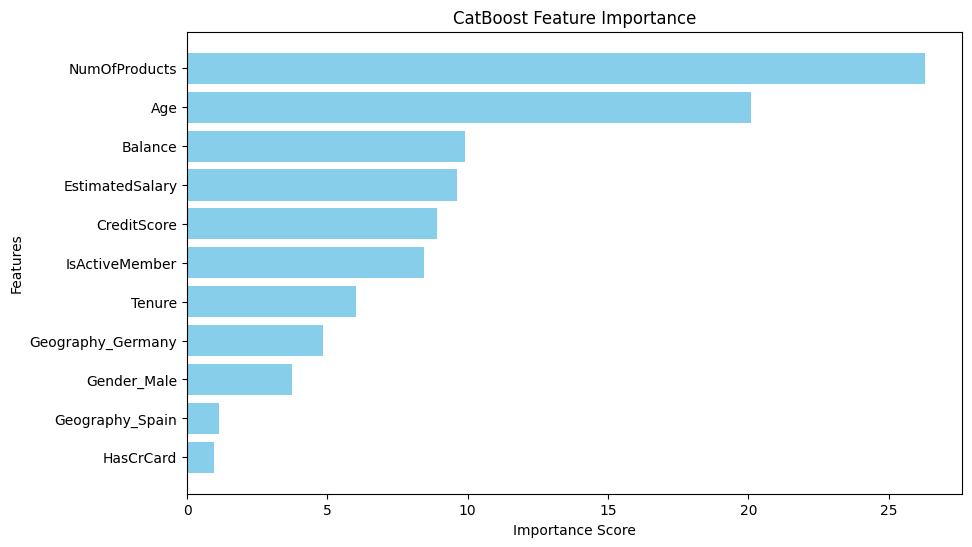

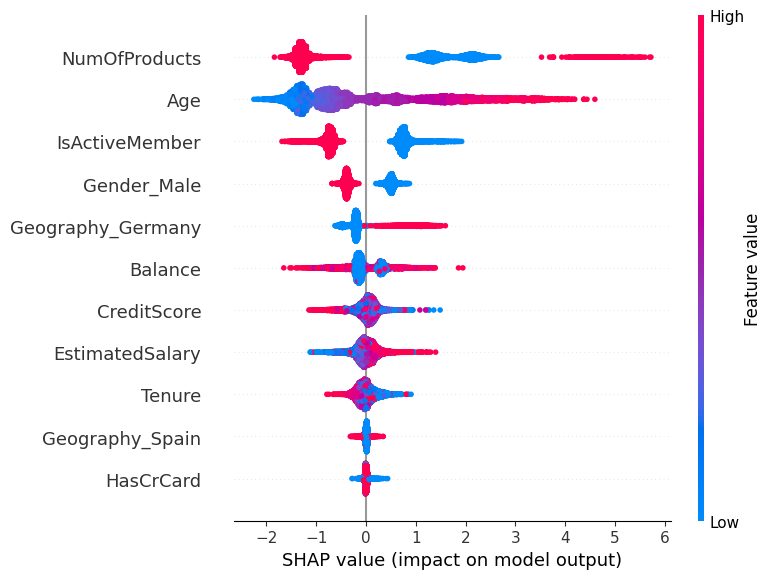

In [272]:
model = CatBoostClassifier(verbose=0, random_state=42)
model.fit(X_train, y_train)

feature_importances = model.get_feature_importance()
feature_names = X_train.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('CatBoost Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train)

feature_importance_df.reset_index(drop=True, inplace=True)


In [273]:
X_train_after_selection = X_train.drop(columns=['HasCrCard','Geography_Spain'])
X_val_after_selection = X_val.drop(columns=['HasCrCard','Geography_Spain'])
X_test = X_test.drop(columns=['HasCrCard','Geography_Spain'])

In [274]:
# Exporter le DataFrame en CSV
X_train_after_selection.to_csv('data/X_train_after_selection.csv', index=False)
y_train.to_csv('data/y_train.csv', index=False)
X_val_after_selection.to_csv('data/X_val_after_selection.csv', index=False)
y_val.to_csv('data/y_val.csv', index=False)
X_test.to_csv('data/X_test.csv', index=False)